In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.19.0                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.65 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.30 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  37.95 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  49.44 MB/s
Libraries imported.


In [5]:
Budapest_data = pd.read_csv("https://raw.githubusercontent.com/kbkln/Coursera_Capstone/master/Budapest_data_districts.csv") 
Budapest_data.head()

,District,Latitude,Longitude
0,Budapest I. kerület,47.496997,19.034290
1,Budapest II. kerület,47.542471,18.972903
2,Budapest III. kerület,47.568691,19.027668
3,Budapest IV. kerület,47.577779,19.093164
4,Budapest V. kerület,47.500335,19.048971


In [6]:
print('The dataframe has {} districts.'.format(
        Budapest_data.shape[0]
    )
)

The dataframe has 23 districts.


In [7]:
address = 'Budapest, Hungary'

geolocator = Nominatim(user_agent="bud_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Budapest are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Budapest are 47.4983815, 19.0404707.


In [8]:
# create map of Budapest using latitude and longitude values
map_budapest = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(Budapest_data['Latitude'], Budapest_data['Longitude'], Budapest_data['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_budapest)  
    
map_budapest

In [9]:
CLIENT_ID = '3U4HCOPRSFKFWXA5YKGHUB5SHMRLYDLAGH1B4A53CRWG4OFY' # your Foursquare ID
CLIENT_SECRET = 'XBKCPYV5V3LBLMM4GSVCRWCXPWX5OZ4I14Z5LG0YYNYNB5JA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3U4HCOPRSFKFWXA5YKGHUB5SHMRLYDLAGH1B4A53CRWG4OFY
CLIENT_SECRET:XBKCPYV5V3LBLMM4GSVCRWCXPWX5OZ4I14Z5LG0YYNYNB5JA


In [10]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
section = "food"

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
budapest_venues = getNearbyVenues(names=Budapest_data['District'],
                                   latitudes=Budapest_data['Latitude'],
                                   longitudes=Budapest_data['Longitude']
                                  )
#print(budapest_venues.shape)
budapest_venues.head()

Budapest I. kerület
Budapest II. kerület
Budapest III. kerület
Budapest IV. kerület
Budapest V. kerület
Budapest VI. kerület
Budapest VII. kerület
Budapest VIII. kerület
Budapest IX. kerület
Budapest X. kerület
Budapest XI. kerület
Budapest XII. kerület
Budapest XIII. kerület
Budapest XIV. kerület
Budapest XV. kerület
Budapest XVI. kerület
Budapest XVII. kerület
Budapest XVIII. kerület
Budapest XIX. kerület
Budapest XX. kerület
Budapest XXI. kerület
Budapest XXII. kerület
Budapest XXIII. kerület


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Budapest I. kerület,47.496997,19.03429,Szelence Café,47.497767,19.031901,Café
1,Budapest I. kerület,47.496997,19.03429,Déryné Bisztró,47.497269,19.031708,Bistro
2,Budapest I. kerület,47.496997,19.03429,FÁMA Budapest,47.497830,19.032812,Modern European Restaurant
3,Budapest I. kerület,47.496997,19.03429,A kis pékinas,47.496384,19.030664,Bakery
4,Budapest I. kerület,47.496997,19.03429,Csészényi Kávézó,47.497440,19.031120,Café


In [14]:
budapest_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Budapest I. kerület,41,41,41,41,41,41
Budapest III. kerület,2,2,2,2,2,2
Budapest IV. kerület,4,4,4,4,4,4
Budapest IX. kerület,1,1,1,1,1,1
Budapest V. kerület,91,91,91,91,91,91
Budapest VI. kerület,60,60,60,60,60,60
Budapest VII. kerület,28,28,28,28,28,28
Budapest VIII. kerület,6,6,6,6,6,6
Budapest X. kerület,1,1,1,1,1,1


In [15]:
print('There are {} uniques categories.'.format(len(budapest_venues['Venue Category'].unique())))

There are 51 uniques categories.


In [16]:
# one hot encoding
budapest_onehot = pd.get_dummies(budapest_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
budapest_onehot['District'] = budapest_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [budapest_onehot.columns[-1]] + list(budapest_onehot.columns[:-1])
budapest_onehot = budapest_onehot[fixed_columns]

budapest_onehot.head()

,District,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Café,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hungarian Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Noodle House,Pet Café,Pizza Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Budapest I. kerület,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Budapest I. kerület,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Budapest I. kerület,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Budapest I. kerület,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Budapest I. kerület,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
budapest_onehot.shape

(298, 52)

In [18]:
budapest_grouped = budapest_onehot.groupby('District').mean().reset_index()
budapest_grouped

,District,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Café,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hungarian Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Noodle House,Pet Café,Pizza Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Budapest I. kerület,0.000000,0.024390,0.024390,0.073171,0.048780,0.024390,0.024390,0.000000,0.268293,0.000000,0.000000,0.000000,0.000000,0.048780,0.048780,0.048780,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.0,0.024390,0.000000,0.000000,0.097561,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.024390,0.000000,0.000000,0.024390,0.000000,0.097561,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000
1,Budapest III. kerület,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Budapest IV. kerület,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Budapest IX. kerület,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Budapest V. kerület,0.000000,0.000000,0.010989,0.021978,0.032967,0.021978,0.010989,0.010989,0.054945,0.010989,0.000000,0.010989,0.010989,0.000000,0.000000,0.065934,0.010989,0.000000,0.000000,0.000000,0.010989,0.021978,0.0,0.010989,0.000000,0.000000,0.098901,0.010989,0.000000,0.175824,0.032967,0.000000,0.000000,0.010989,0.010989,0.000000,0.054945,0.010989,0.010989,0.021978,0.000000,0.142857,0.021978,0.010989,0.000000,0.021978,0.010989,0.010989,0.000000,0.000000,0.021978
5,Budapest VI. kerület,0.016667,0.000000,0.000000,0.066667,0.000000,0.016667,0.016667,0.016667,0.100000,0.000000,0.050000,0.000000,0.000000,0.000000,0.016667,0.050000,0.000000,0.000000,0.000000,0.016667,0.000000,0.016667,0.0,0.000000,0.016667,0.016667,0.050000,0.083333,0.016667,0.066667,0.033333,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.066667,0.000000,0.016667,0.016667,0.016667,0.016667,0.050000,0.000000,0.050000,0.066667
6,Budapest VII. kerület,0.000000,0.035714,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.071429,0.035714,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.03571

In [19]:
budapest_grouped.shape

(20, 52)

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = budapest_grouped['District']

for ind in np.arange(budapest_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(budapest_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Budapest I. kerület,Café,Hungarian Restaurant,Restaurant,Bakery,Eastern European Restaurant,Diner,Deli / Bodega,Bistro,Modern European Restaurant,Mexican Restaurant
1,Budapest III. kerület,Diner,Deli / Bodega,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant
2,Budapest IV. kerület,Bakery,Burger Joint,Restaurant,Chinese Restaurant,Vietnamese Restaurant,Deli / Bodega,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
3,Budapest IX. kerület,Chinese Restaurant,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant
4,Budapest V. kerület,Italian Restaurant,Restaurant,Hungarian Restaurant,Eastern European Restaurant,Café,Modern European Restaurant,Japanese Restaurant,Bistro,Pizza Place,French Restaurant


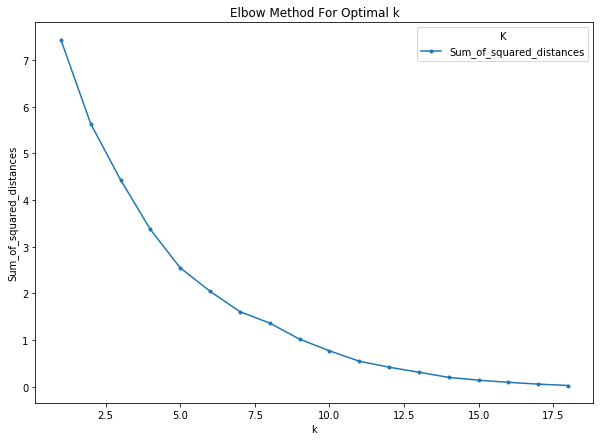

In [22]:
train_data = budapest_grouped.drop('District', 1)
Sum_of_squared_distances = []
K = range(1, 19)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_data)
    Sum_of_squared_distances.append(km.inertia_)
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)

optimal_k.plot(kind = 'line', figsize = (10, 7), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
# set number of clusters
kclusters = 7

budapest_grouped_clustering = budapest_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(budapest_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 2, 0, 0, 0, 0, 2, 0], dtype=int32)

In [25]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

budapest_merged = Budapest_data

budapest_merged = district_venues_sorted.join(budapest_merged.set_index('District'), on='District')

budapest_merged.head() # check the last columns!

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,0,Budapest I. kerület,Café,Hungarian Restaurant,Restaurant,Bakery,Eastern European Restaurant,Diner,Deli / Bodega,Bistro,Modern European Restaurant,Mexican Restaurant,47.496997,19.034290
1,3,Budapest III. kerület,Diner,Deli / Bodega,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,47.568691,19.027668
2,0,Budapest IV. kerület,Bakery,Burger Joint,Restaurant,Chinese Restaurant,Vietnamese Restaurant,Deli / Bodega,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,47.577779,19.093164
3,2,Budapest IX. kerület,Chinese Restaurant,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,47.465070,19.096752
4,0,Budapest V. kerület,Italian Restaurant,Restaurant,Hungarian Restaurant,Eastern European Restaurant,Café,Modern European Restaurant,Japanese Restaurant,Bistro,Pizza Place,French Restaurant,47.500335,19.048971


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(budapest_merged['Latitude'], budapest_merged['Longitude'], budapest_merged['District'], budapest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [27]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 0, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,0,Budapest I. kerület,Café,Hungarian Restaurant,Restaurant,Bakery,Eastern European Restaurant,Diner,Deli / Bodega,Bistro,Modern European Restaurant,Mexican Restaurant,47.496997,19.034290
2,0,Budapest IV. kerület,Bakery,Burger Joint,Restaurant,Chinese Restaurant,Vietnamese Restaurant,Deli / Bodega,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,47.577779,19.093164
4,0,Budapest V. kerület,Italian Restaurant,Restaurant,Hungarian Restaurant,Eastern European Restaurant,Café,Modern European Restaurant,Japanese Restaurant,Bistro,Pizza Place,French Restaurant,47.500335,19.048971
5,0,Budapest VI. kerület,Café,Indian Restaurant,Vietnamese Restaurant,Restaurant,Italian Restaurant,Bakery,Chinese Restaurant,Thai Restaurant,Eastern European Restaurant,Vegetarian / Vegan Restaurant,47.508077,19.064426
6,0,Budapest VII. kerület,Bakery,Pizza Place,Diner,Fast Food Restaurant,Restaurant,Café,Korean Restaurant,Chinese Restaurant,Hungarian Restaurant,Vegetarian / Vegan Restaurant,47.502627,19.077243
7,0,Budapest VIII. kerület,Bakery,Café,Chinese Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Diner,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,47.488755,19.086433
9,0,Budapest XI. kerület,Bistro,Food Court,Diner,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food,Fast Food Restaurant,47.458334,19.021351
11,0,Budapest XIII. kerület,Restaurant,Café,Indian Restaurant,Diner,Turkish Restaurant,Eastern European Restaurant,Bakery,Bistro,Sandwich Place,Hungarian Restaurant,47.536804,19.074199
12,0,Budapest XIV. kerület,Deli / Bodega,Bakery,Vietnamese Restaurant,Food,Italian Restaurant,Burger Joint,Pizza Place,Chinese Restaurant,Eastern European Restaurant,Diner,47.523004,19.114513
15,0,Budapest XVII. kerület,Asian Restaurant,Café,Pizza Place,Vietnamese Restaurant,Deli / Bodega,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,47.475693,19.268780


In [28]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 1, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
13,1,Budapest XIX. kerület,Café,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,47.44563,19.14151


In [29]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 2, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,2,Budapest IX. kerület,Chinese Restaurant,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,47.465070,19.096752
8,2,Budapest X. kerület,Chinese Restaurant,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,47.482405,19.158975


In [30]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 3, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
1,3,Budapest III. kerület,Diner,Deli / Bodega,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,47.568691,19.027668
10,3,Budapest XII. kerület,Deli / Bodega,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,47.504790,18.982836


In [31]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 4, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
17,4,Budapest XX. kerület,Bakery,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,47.433099,19.118806
19,4,Budapest XXII. kerület,Bakery,Pizza Place,Vietnamese Restaurant,Creperie,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,47.410384,19.000967


In [32]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 5, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
16,5,Budapest XVIII. kerület,Fried Chicken Joint,Food Truck,Vietnamese Restaurant,Creperie,French Restaurant,Food Court,Food,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,47.426619,19.207325


In [33]:
budapest_merged.loc[budapest_merged['Cluster Labels'] == 6, budapest_merged.columns[[0] + list(range(1, budapest_merged.shape[1]))]]

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
14,6,Budapest XVI. kerület,Hungarian Restaurant,Eastern European Restaurant,Vietnamese Restaurant,German Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,47.518266,19.204295


In [34]:
#budapest_venues_district = budapest_venues.groupby(['District','Venue Category'])['Venue'].count().reset_index()
budapest_venues_district = budapest_venues.groupby('District').aggregate({'Venue':'count',
                                                        'District Latitude':'first',
                                                        'District Longitude':'first'}).reset_index()
budapest_venues_district


,District,District Longitude,District Latitude,Venue
0,Budapest I. kerület,19.034290,47.496997,41
1,Budapest III. kerület,19.027668,47.568691,2
2,Budapest IV. kerület,19.093164,47.577779,4
3,Budapest IX. kerület,19.096752,47.465070,1
4,Budapest V. kerület,19.048971,47.500335,91
5,Budapest VI. kerület,19.064426,47.508077,60
6,Budapest VII. kerület,19.077243,47.502627,28
7,Budapest VIII. kerület,19.086433,47.488755,6
8,Budapest X. kerület,19.158975,47.482405,1
9,Budapest XI. kerület,19.021351,47.458334,3


In [35]:
!wget --quiet https://raw.githubusercontent.com/kbkln/Coursera_Capstone/master/stanford-dt251rh6351-geojson%20-%20Copy.json -O world_countries.json
world_geo = r'world_countries.json'
threshold_scale = np.linspace(#budapest_venues_district_coffee['Venue'].min(),
                              #budapest_venues_district_coffee['Venue'].max(),
                              budapest_venues_district['Venue'].min(),
                              budapest_venues_district['Venue'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1
world_map = folium.Map(location=[latitude, longitude], zoom_start=11)

world_map.choropleth(
    geo_data=world_geo,
    #data=budapest_venues_district_coffee,
    data=budapest_venues_district,
    columns=['District', 'Venue'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='PuRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Eating out venues'
)

# add markers to map
for lat, lng, district, venue in zip(budapest_venues_district['District Latitude'], budapest_venues_district['District Longitude'], budapest_venues_district['District'], budapest_venues_district['Venue']):
    
    label = '{},{}'.format(district,
                           venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#31184f',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  

# display map
world_map